In [2]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pylab as plot  #画图
import glob   #读取文件

<dtype: 'string'>
<dtype: 'uint8'>


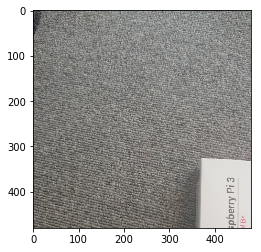

In [4]:
#尝试对一张图片的处理
images = tf.io.read_file('E:\\data_img\\1543134989_001.png')
print(images.dtype)
images = tf.image.decode_png(images,channels=3)
print(images.dtype)
plot.imshow(images)

(480, 480, 3)
<dtype: 'uint8'>
(480, 480, 1)
<dtype: 'uint8'>
[0 1]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
uint8


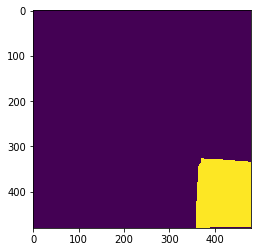

In [4]:
#查看属性
label = tf.io.read_file('E:\\data_label\\1543134989_001_label.png')
label = tf.image.decode_png(label,channels=3)
#print(label)
print(label.shape)
print(label.dtype)
label = tf.image.rgb_to_grayscale(label)
print(label.shape)
print(label.dtype)
print(np.unique(label))
label = np.squeeze(label)
print(label)
print(label.dtype)
plot.imshow(label)

In [3]:
#遍历路径下的所有图片
images = glob.glob('E:/data_img/*.png')
labels = glob.glob('E:/data_label/*.png')
len(images),len(labels)

(251, 251)

In [5]:
images[:5]

['E:/data_img\\1543134989_001.png',
 'E:/data_img\\1543135019_002.png',
 'E:/data_img\\1543135033_003.png',
 'E:/data_img\\1543135045_004.png',
 'E:/data_img\\1543135057_005.png']

In [6]:
labels[:5]

['E:/data_label\\1543134989_001_label.png',
 'E:/data_label\\1543135019_002_label.png',
 'E:/data_label\\1543135033_003_label.png',
 'E:/data_label\\1543135045_004_label.png',
 'E:/data_label\\1543135057_005_label.png']

In [7]:
images.sort()
labels.sort()

In [8]:
images[:5]
labels[:5]

['E:/data_label\\1543134989_001_label.png',
 'E:/data_label\\1543135019_002_label.png',
 'E:/data_label\\1543135033_003_label.png',
 'E:/data_label\\1543135045_004_label.png',
 'E:/data_label\\1543135057_005_label.png']

In [4]:
#对数据集做处理，包括处理训练集和验证集各有的百分比
dataset = tf.data.Dataset.from_tensor_slices((images,labels))
test_num = int(len(images)*0.1)
trian_num = len(images)-test_num

train_dataset = dataset.skip(test_num)
test_dataset = dataset.take(test_num)

print(test_num,trian_num)

25 226


In [5]:
train_dataset

<SkipDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [6]:
#处理数据集的整个函数
def decode_images(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img,channels=3)
    img = tf.cast(img,tf.float32)
    img = img/127.5-1
    return img

def decode_label(path):
    label = tf.io.read_file(path)
    label = tf.image.decode_png(label,channels=3)
    label = tf.image.rgb_to_grayscale(label)
    return label

def image_label_process(image_path,label_path):
    images = decode_images(image_path)
    label = decode_label(label_path)
    images = tf.image.resize(images,[480,480])
    label = tf.image.resize(label,[480,480])
    return images,label

In [7]:
train_dataset = train_dataset.map(image_label_process)
test_dataset = test_dataset.map(image_label_process)

In [8]:
train_dataset

<MapDataset shapes: ((480, 480, 3), (480, 480, 1)), types: (tf.float32, tf.float32)>

In [9]:
test_dataset

<MapDataset shapes: ((480, 480, 3), (480, 480, 1)), types: (tf.float32, tf.float32)>

In [10]:
train_dataset = train_dataset.repeat().batch(2)
test_dataset = test_dataset.batch(2)

In [11]:
train_dataset

<BatchDataset shapes: ((None, 480, 480, 3), (None, 480, 480, 1)), types: (tf.float32, tf.float32)>

In [16]:
# inputs=tf.keras.layers.Input(shape=(480,480,3))

# conv1_1=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(inputs)
# conv1_2=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(conv1_1)
# pool1=tf.keras.layers.MaxPooling2D()(conv1_2)

# conv2_1=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(pool1)
# conv2_2=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(conv2_1)
# pool2=tf.keras.layers.MaxPooling2D()(conv2_2)

# conv3_1=tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu')(pool2)
# conv3_2=tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu')(conv3_1)
# pool3=tf.keras.layers.MaxPooling2D()(conv3_2)

# conv4_1=tf.keras.layers.Conv2D(512,(3,3),padding='same',activation='relu')(pool3)
# conv4_2=tf.keras.layers.Conv2D(512,(3,3),padding='same',activation='relu')(conv4_1)
# pool4=tf.keras.layers.MaxPooling2D()(conv4_2)

# conv5_1=tf.keras.layers.Conv2D(1024,(3,3),padding='same',activation='relu')(pool4)
# conv5_2=tf.keras.layers.Conv2D(1024,(3,3),padding='same',activation='relu')(conv5_1)
# conv5_up=tf.keras.layers.Conv2DTranspose(512,
#                           kernel_size=(2,2),
#                           strides=(2, 2),
#                           padding='same',
#                           activation='relu')(conv5_2)

# t1_concat=tf.concat([conv4_2,conv5_up],axis=3)
# conv6_1=tf.keras.layers.Conv2D(512,(3,3),padding='same',activation='relu')(t1_concat)
# conv6_2=tf.keras.layers.Conv2D(512,(3,3),padding='same',activation='relu')(conv6_1)
# conv6_up=tf.keras.layers.Conv2DTranspose(256,
#                           kernel_size=(2,2),
#                           strides=(2, 2),
#                           padding='same',
#                           activation='relu')(conv6_2)

# t2_concat=tf.concat([conv3_2,conv6_up],axis=3)
# conv7_1=tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu')(t2_concat)
# conv7_2=tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu')(conv7_1)
# conv7_up=tf.keras.layers.Conv2DTranspose(128,
#                           kernel_size=3,
#                           strides=(2, 2),
#                           padding='same',
#                           activation='relu')(conv7_2)

# t3_concat=tf.concat([conv2_2,conv7_up],axis=3)
# conv8_1=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(t3_concat)
# conv8_2=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(conv8_1)
# conv8_up=tf.keras.layers.Conv2DTranspose(64,
#                           kernel_size=(2,2),
#                           strides=(2, 2),
#                           padding='same',
#                           activation='relu')(conv8_2)

# t4_concat=tf.concat([conv1_2,conv8_up],axis=3)

# conv9_1=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(t4_concat)
# conv9_2=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(conv9_1)

# out_put_layer=tf.keras.layers.Conv2D(2,(1,1),padding='same',activation='softmax')(conv9_2)


# new_model=tf.keras.models.Model(inputs=inputs,
#                                outputs=out_put_layer)
# new_model.summary()


In [17]:
# new_model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
#              loss='sparse_categorical_crossentropy',
#              metrics=['acc'])

In [22]:
new_model=tf.keras.models.load_model('./unetv1.h5')
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 480, 480, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 480, 480, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 480, 480, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 240, 240, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
new_model.fit(train_dataset,
              epochs=5,
              initial_epoch=1,
              steps_per_epoch=trian_num//2,
             validation_data=test_dataset,
             validation_steps=test_num//2)

Train for 113 steps, validate for 12 steps
Epoch 2/5
113/113 [==============================] - 2333s 21s/step - loss: 1.8113 - acc: 0.8835 - val_loss: 1.8033 - val_acc: 0.8881
Epoch 3/5
 61/113 [===============>..............] - ETA: 17:36 - loss: 1.7859 - acc: 0.8892

In [ ]:
new_model.save('./unetv2.h5')

In [ ]:
new_model.save('unetv1.h5')